#### Université Paul Sabatier, M2MAPI3
# Big data - practical 1: perceptron and SVM
We advise to use [matplotlib](https://matplotlib.org/) for plots and [numpy](https://numpy.org/). The online documentation contains information regarding the use of these libraries how to use these libraries.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import math as math
import numpy as np
import numpy.random as npr

## Exercice 1: estimation of the mean of a univariate random variable

Let $x_1,\ldots,x_n$ be a real numbers, their mean is given by
$$\bar{x} = \arg\min_y f(y) $$
Where 
$$f \colon y \mapsto \frac{1}{n} \sum_{i=1}^n (y-x_i)^2$$
The following code generates input data and plots f. 

**Question 0:** what are the inputs? what is the argmin? what is the min?

- > The inputs are 10 values equally distributed between 1 and 10, the argmin is 5.5, and the min is 8.25.

Empirical mean:
5.5
min : 8.25


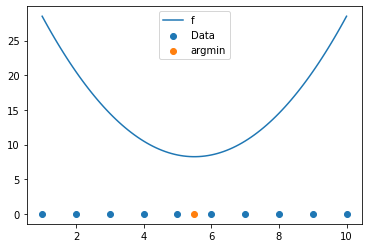

In [2]:
n = 10
x = np.linspace(1,10,10)
print("Empirical mean:")
print(np.mean(x))
print('min :',np.mean( (np.mean(x)-x)**2 ))
plt.scatter(x, np.zeros(10), label = "Data")
plt.scatter(5.5, 0, label = "argmin")
y = np.linspace(10,100,100)/10

plt.plot(y, y**2 - 2 * np.mean(x) * y + np.mean(x**2), label = "f")
plt.legend()

**Question 1:** Implement the gradient descent algorithm on $f$ with $y_0 = 2$ and stepsize equal to $1/3$.
\begin{align*}
    y_{k+1} &= y_k - f'(y_k) / 3
\end{align*}
We set $f_k = f(y_k)$ for each $k$. Plot $f_k - f^*$ in logarithmic scale as a function of $k$. Plot the value of $|y_k - y^*|$, where $y^*$ is the argmin, as a function of $k$ in logarithmic scale. What can you say about these results? 

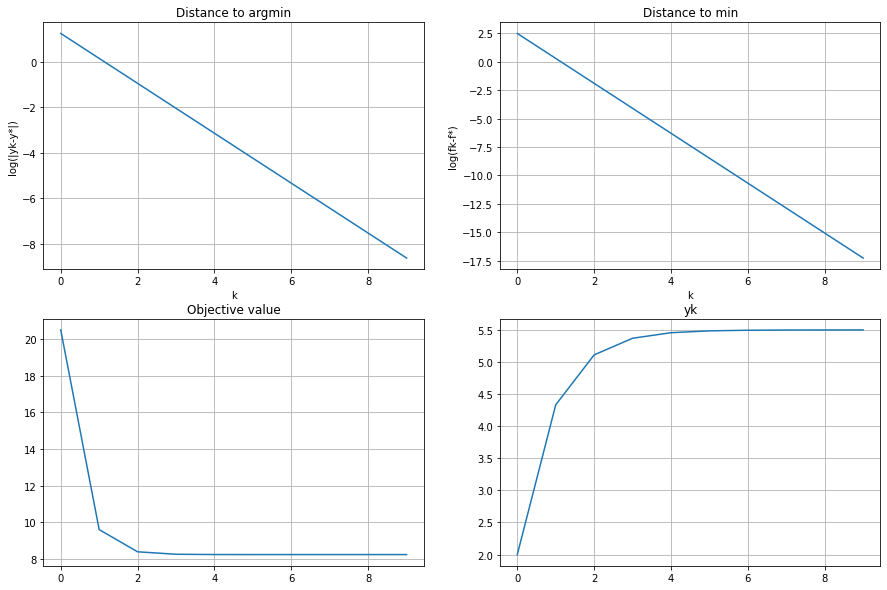

In [3]:
def f(y,x):
    return np.mean((y-x)**2)

def df(y,x):
    n = len(x)
    return np.sum(y-x)*2/n

y_star = 5.5

lr = 1/3
y = 2
ys = [y]
grad = df(y,x)
while abs(grad) > 1e-3:
    y = y - lr * grad
    grad = df(y,x)
    ys.append(y)
plt.figure(figsize=(15,10))
plt.subplot(221,title='Distance to argmin')
plt.grid()
plt.plot(np.log(np.abs(np.array(ys)-y_star)), label=f'Gradient descent {lr}');
plt.xlabel("k")
plt.ylabel("log(|yk-y*|)");


plt.subplot(222,title='Distance to min')
plt.grid()
fys = np.array([f(y,x) for y in ys])
plt.plot(np.log( fys -f(y_star,x) ), label=f'Gradient descent {lr}');
plt.xlabel("k")
plt.ylabel("log(fk-f*)");

plt.subplot(223,title='Objective value')
plt.grid()
plt.plot(fys)

plt.subplot(224,title='yk')
plt.grid()
plt.plot(ys);

We are going to introduce minibatching strategies, we need the following
* $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes
* $(I_k)_{k \in \mathbb{N}}$ a sequence of independant random integers uniformly distributed on $\{1,\ldots, n\}$.

**Question 2:** how can you simulate the sequence $(I_k)_{k \in \mathbb{N}}$? Provide an illustration bellow

In [4]:
n_steps = 20
for k in range(n_steps):
    print(f'k = {k}, random integer: {np.random.randint(0,n)}')

k = 0, random integer: 4
k = 1, random integer: 7
k = 2, random integer: 3
k = 3, random integer: 2
k = 4, random integer: 0
k = 5, random integer: 9
k = 6, random integer: 7
k = 7, random integer: 4
k = 8, random integer: 9
k = 9, random integer: 3
k = 10, random integer: 2
k = 11, random integer: 6
k = 12, random integer: 9
k = 13, random integer: 5
k = 14, random integer: 2
k = 15, random integer: 3
k = 16, random integer: 4
k = 17, random integer: 0
k = 18, random integer: 0
k = 19, random integer: 3


The following algorithm is an application of the minibatch gradient descent strategy on $f$. To compute $\bar{x}$. 
given $y_0 \in \mathbb{R}$ and $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes:
\begin{align*}
    I_k &\sim U(\{1,\ldots,n\})\\
    y_{k+1} &= y_k - \alpha_k (y_k - x_{I_k})
\end{align*}

**Question 3** What is the expectation of $y_{k+1}$ given $y_k$? How does this algorithm relate to the gradient descent algorithm? How is it different?

- > $\mathbb{E}(x_{I_k}) = y^\star$ so $\mathbb{E}(y_{k+1}) = y_k - \alpha_k(y_k - y^\star)$.
- > This algorithm relates to the gradient descent algorithm in the way that the approach almost the same : iterating small steps in descent directions.
- > Is is different because instead of computing the complete derivative of the objective function at each step, we are now approximating evaluating it over a subset (a mini-batch, here of size 1) of our data points.

**Question 4** Implement 300 iterations of this algorithm with $y_0 = 2$. Try constant step size $\alpha_k = \alpha$ for all $k$, with  $\alpha = 0.5, 0.1, 0.02$. Represent the iterates $y_k$ as a function of $k$. Make comments about the behavior of the algorithm. Is it similar to what you observed for gradient descent? How does the step size affects the result?

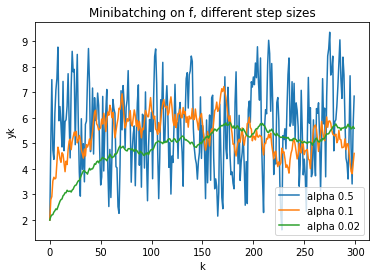

In [7]:
alphas = [0.5,.1,.02]
n_steps = 300
for i, alpha in enumerate(alphas):
    y = 2
    ys = [y]
    for k in range(1,n_steps):
        I = np.random.randint(0,n)
        y = y - alpha * (y - x[I])
        ys.append(y)
    plt.plot(ys,label=f'alpha {alpha}')
plt.legend()
plt.title("Minibatching on f, different step sizes");
plt.xlabel("k")
plt.ylabel("yk");

**Behaviour of the algorithm :**
- > The larger the step size, the more erratic the gradient descent. With a too large step size, the algorithm fails to converge (see alpha = 0.5).
- > The bigger the step size, the faster the start. But then, it starts to oscillate near the solution with an amplitude proportional to the step size.
- > It also takes much more steps than before to converge.
- > This approach is more explorative than the previous one.

**Question 5:** Try the same algorithm with a step size of the form $\alpha_k = 1 / (k+1)$ for all $k$. Represent three runs of the algorithm on the same graph with 1000 iterations. Comments the results. 

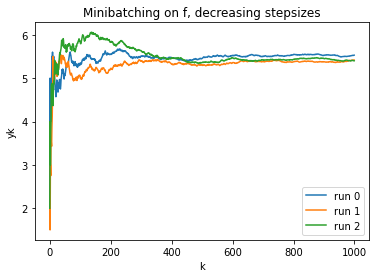

In [8]:
n_steps = 1000
for i in range(3):
    y = 2
    ys = [y]
    for k in range(1,n_steps):
        I = np.random.randint(0,n)
        y = y - 1/(k+1) * (y - x[I])
        ys.append(y)
    plt.plot(ys,label=f'run {i}')
plt.legend()
plt.title("Minibatching on f, decreasing stepsizes");
plt.xlabel("k")
plt.ylabel("yk");

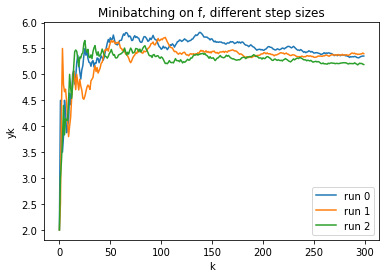

In [9]:
n_steps = 300
for i in range(3):
    y = 2
    ys = [y]
    for k in range(1,n_steps):
        I = np.random.randint(0,n)
        y = y - 1/(k+1) * (y - x[I])
        ys.append(y)
    plt.plot(ys,label=f'run {i}')
plt.legend()
plt.title("Minibatching on f, different step sizes");
plt.xlabel("k")
plt.ylabel("yk");

**Comment**
- > With these stepsizes, the algorithm always converge towards the solution, but it can be very long. This is mostly due to the fact that the serie of term $1/k$ diverges.

**Question 6:** Experiment with different step size regimes. Which conclusions can you make regarding these experiments? Comment on the sensitivity of the minibatch strategy to step sizes. Is the proposed minibatching strategy a good algorithm to estimate the mean? In which situation would it be favorable to use this strategy?

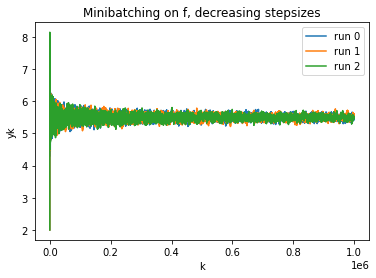

In [10]:
n_steps = 1000000
for i in range(3):
    y = 2
    ys = [y]
    for k in range(1,n_steps):
        I = np.random.randint(0,n)
        y = y - 1/(k+1)**.5 * (y - x[I])
        ys.append(y)
    plt.plot(ys,label=f'run {i}')
plt.legend()
plt.title("Minibatching on f, decreasing stepsizes");
plt.xlabel("k")
plt.ylabel("yk");

- > I've tried : $q^k$ with $ 0<q<1$,   $1/k²$,   $1/(k \log{k})$ and all of these regimes failed to converge to the solution.
- > I also tried $1/\sqrt{k}$ and it seemed to work, but took even longer than the $1/k$ regime to converge.

We can conclude that the algorithm is very sensible to step sizes in order to converge to the solution.

The first approach (the basic gradient step method) was more efficient (less than 20 steps to "converge") and less explorative than the mini-batch approach.

Here our loss function is convex and so being explorative is not necessary, but if a loss function came to not be convex, then the mini-batch strategy would help us avoiding local minimas with the explorativity that is built-in this approach.

## Exercice 2: single layer perceptron (1957)

The following code provides a two label dataset in $\mathbb{R}^2$: $x_1,\ldots, x_n$ is a set of $n$ vectors in $\mathbb{R}^2$ and $y_1,\ldots,y_n$ are the corresponding labels ($-1$ or $1$). 

$X$ is a table of size $n \times 2$ and $y$ is a vector of labels of size $n$ (0 or 1). We also provide functions which allow to plot data and plot a line which equation is given by 
$$w^Tx + b = 0$$
for a vector $w \in \mathbb{R}^2$ and a bias term $b \in \mathbb{R}$.

In [11]:
## Generate data
n = 200
angles = 2 * math.pi * npr.rand(n) - math.pi / 4
radii = npr.rand(n) * 0.4 + 0.8
x1 = radii * np.cos(angles)
x2 = radii * np.sin(angles)
X = np.vstack((x1,x2)).transpose()
y = 1. * (angles > 3*math.pi/4) * 2 - 1

temp = y==-1.
X[temp,0] = X[temp,0] - 1
X[temp,1] = X[temp,1] + 0.5

## Functions for plots
def addline(w, b, label, xlim = (-2,1), ylim = (-1,2)):
    ## Adds a line to a plot
    if abs(w[1]) < 1e-3:
        ytemp = np.arange(ylim[0] * 100, ylim[1] * 100) / 100
        xtemp = - ytemp * w[1] / w[0] - b / w[0]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()
        
    else:
        xtemp = np.arange(xlim[0] * 100, xlim[1] * 100) / 100
        ytemp = - xtemp * w[0] / w[1] - b / w[1]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()


def plotData(X,y):
    ## Plot data
    for k in (-1,1):
        temp = y==k
        plt.plot(X[temp,0], X[temp,1], '.', label = k)

    plt.legend()
    plt.axis('equal')

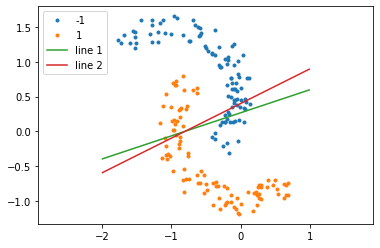

In [12]:
## Example of usage

plotData(X,y)
addline((1,-3), 0.8, "line 1")
addline((1,-2), 0.8, "line 2")

The perceptron algorithm aims at building a classifier of the form
\begin{align*}
    f_{w,b} \colon x \mapsto \mathrm{sign}(w^Tx + b)
\end{align*}
where $w \in \mathbb{R}^2$ and $b \in \mathbb{R}$ are weights and bias parameters.
The perceptron learning algorithm goes as follows: start with $w_0 \in \mathbb{R}^2$, $b_0 \in \mathbb{R}$ and iterate for $k \in \mathbb{N}$:
\begin{align*}
    &I_k  \sim U(\{1,\ldots, n\})\\
    &\begin{cases}
            w_{k+1} &= w_k + \alpha y_{I_k} x_{I_k} \qquad &b_{k+1} = b_k + \alpha y_{I_k}  \qquad &\text{ if } (w^Tx_{I_k}+b) y_{I_k} < 0 \\
        w_{k+1} &= w_k  \qquad &b_{k+1} = b_k  \qquad &\text{ otherwise }
    \end{cases}
\end{align*}
where $\alpha$ is a step parameter.

**Question 7:** Implement the algorithm and plot the data as well as the decision boundary given by the final iterate. Use the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 500 iterations
* $\alpha_k = 1$ for all $k$.

Plot data and the decision boundary corresponding to 5 different runs on the same picture. Print also the value of the bias and weight vector at the last iteration.

run 0, weight and bias :
[-3.2688239098707967, -2.5882881471716184] -1.0
run 1, weight and bias :
[-2.4988281406905126, -3.1104574738972413] -1.0
run 2, weight and bias :
[-2.317280832732992, -2.7288951188513693] 1.0
run 3, weight and bias :
[-2.5102752785069598, -2.570821715361509] 0.0
run 4, weight and bias :
[-1.011580182987844, -3.935458233940625] 0.0


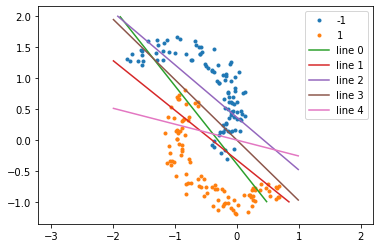

In [14]:
n_runs = 5
n_steps = 500
alpha = 1
plotData(X,y)

for r in range(n_runs) :
    w = np.ones(2)
    b = 1.0
    for i in range(n_steps):
        I = np.random.randint(0,n)
        if (np.vdot(w,X[I]) + b)*y[I] < 0:
            w += alpha * y[I] * X[I]
            b += alpha * y[I]
    print(f'run {r}, weight and bias :')
    print(list(w),b)
    addline(tuple(w),b,f'line {r}')

**Question 8:** What happens if you increase the number of iterations or change the step size? Can you explain what you observe? Does the algorithm seem to converge?

- > with $\alpha = 1$, increasing the number of iterations does not help the algorithm to converge
- > decreasing $\alpha$ and keeping the same number of iterations does not work either.

In both cases the algorithm seems to oscillate around the solution but does not manage to converge.
Below are two examples of this examples with different set of parameters (more iterations or smaller steps).

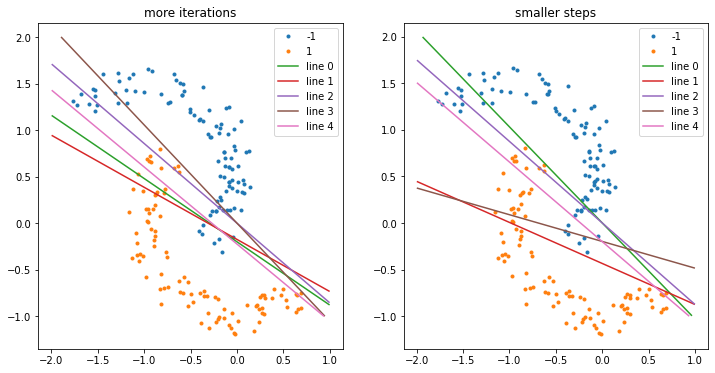

In [15]:
plt.figure(figsize=(12,6))
plt.subplot(121,title='more iterations')
n_runs = 5
n_steps = 5000
alpha = 1
plotData(X,y)

for r in range(n_runs) :
    w = np.ones(2)
    b = 1.0
    for i in range(n_steps):
        I = np.random.randint(0,n)
        if (np.vdot(w,X[I]) + b)*y[I] < 0:
            w += alpha * y[I] * X[I]
            b += alpha * y[I]
    addline(tuple(w),b,f'line {r}')

plt.subplot(122,title='smaller steps')
n_runs = 5
n_steps = 500
alpha = 0.05
plotData(X,y)

for r in range(n_runs) :
    w = np.ones(2)
    b = 1.0
    for i in range(n_steps):
        I = np.random.randint(0,n)
        if (np.vdot(w,X[I]) + b)*y[I] < 0:
            w += alpha * y[I] * X[I]
            b += alpha * y[I]
    addline(tuple(w),b,f'line {r}')

**Question 9:** consider a sequence of step sizes of the form $\alpha_k = 1 / \sqrt{k+1}$ for all $k$? What happens when the number of iteration increases say to $4000$, or $40000$?

run 0, weight and bias :
[-0.057709364175579744, -0.07357713247892811] -0.028415910165055996
run 1, weight and bias :
[-0.050152609471480494, -0.08152702750535831] -0.012645514060475635
run 2, weight and bias :
[-0.07560830194266872, -0.06822272880569288] -0.015078260182526348
run 3, weight and bias :
[-0.05619562090853221, -0.09880291036098376] -0.02433012293508762
run 4, weight and bias :
[-0.05332800262964363, -0.07915386435553048] 0.005242422729585684


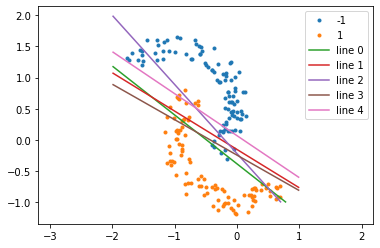

In [16]:
n_runs = 5
n_steps = 4000
plotData(X,y)

for r in range(n_runs) :
    w = np.ones(2)
    b = 1.0
    for k in range(n_steps):
        I = np.random.randint(0,n)
        if (np.vdot(w,X[I]) + b)*y[I] < 0:
            w +=  1/ (k+1)**.5 * y[I] * X[I]
            b += 1/ (k+1)**.5 * y[I]
    print(f'run {r}, weight and bias :')
    print(list(w),b)
    addline(tuple(w),b,f'line {r}')

With this regime of step sizes, and 4000 iterations or even 40 000, the results did not improve.

The perceptron algorithm attempts to minimize the following loss function 
\begin{align*}
    (perceptron) \qquad \min_{w,b} \frac{1}{n} \sum_{i=1}^n l_{\mathrm{perceptron}}(w^T x_i + b, y_i)
\end{align*}
where $l_{\mathrm{perceptron}}(s,y) = \max\{0, -ys\}$ for all $s$. It is actually a (sub)gradient method exactly of the same kind as what we have used in Exercise 1.

**Question 9:** Try to explain the preceeding algorithm in light of these elements. What is the solution to this minimization problem? Does it explain the behaviour observed in your experiments? Try to understand in which sense the algorithm is performing (sub)gradient descent, you may think about the loss function $l_{\mathrm{perceptron}}$ to be piecewise differentiable.

- > If $(w^T x_i + b) y_i > 0$, which means that the model correctly classified the $i$-th example, then $l(w^T x_i + b, y_i) = max\{0, -(w^T x_i + b)y_i \}  = 0$ thus the approximation of the gradient is null.
- > If $(w^T x_i + b) y_i < 0$, which means that the model incorrectly classified the $i$-th example, then $l(w^T x_i + b, y_i) = max\{0, -(w^T x_i + b)y_i \}  = -(w^T x_i + b)y_i$ thus we make the steps described at the beginning of this exercise.


## Exercise 3: Support Vector Machine
Make sure that you finish exercise 2 before starting this one.


The support vector machine is given by the solution of
\begin{align*}
    (SVM) \qquad \min_{w,b} C \sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i) + \frac{1}{2} \|w\|^2 
\end{align*}
where $l_{\mathrm{SVM}}(s) = \max\{0,1 -ys\}$ for all $s$.
The purpose of this section is to derive an algorithm following similar ideas as the perceptron to find a solution for the SVM problem. 



**Question 10:** use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from `scikit-learn` library to solve the SVM problem for $C=1/10$. The kernel should be `'linear'`. Provide the value for the weight and intercept solutions. What happens if you change the value of $C$?

In [17]:
from sklearn.svm import SVC

model = SVC(kernel='linear',C=1/10)
model.fit(X,y)
w, b = model.coef_, model.intercept_
print('C = 1/10, weights and bias :')
print(w,b)
print('weight L2 norm squared :',np.linalg.norm(w)**2,'\n')
model = SVC(kernel='linear',C=1)
model.fit(X,y)
w, b = model.coef_, model.intercept_
print('C = 1, weights and bias :')
print(w,b)
print('weight L2 norm squared :',np.linalg.norm(w)**2)

C = 1/10, weights and bias :
[[-0.81377397 -1.66245588]] [-0.05936095]
weight L2 norm squared : 3.425987638635183 

C = 1, weights and bias :
[[-1.7407815  -2.66668882]] [-0.23668036]
weight L2 norm squared : 10.141549513856946


- > When decreasing the value of $C$, the SVM gets more focused on reducing the norm of $w$, and attach less importance to minimizing the $l_{SVM}$ term, and so the accuracy over the training examples is decreased.
- > When increasing $C$, it is the opposite.

- > $C$ has to make the perfect balance between an overfitted model and an underfitted model. 

**Question 11:** We are going to consider an intermediate problem which is simpler than the SVM problem. Consider the unregularized SVM
\begin{align*}
    (pseudo-SVM) \qquad \min_{w,b} \sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i)
\end{align*}
By analogy with the perceptron (the loss is almost the same), derive an algorithm to solve this problem. Perform the same experiment as what you did with the perceptron, using the following parameters
* initialize weights $w$ and bias $b$ to be equal to $0$
* 1000 iterations
* $\alpha_k = 1 / \sqrt{1+k}$ for all $k$.

What happens? What is the difference with the perceptron? Comment on the importance of the loss function.

run 0, weight and bias :
[-1.1559674002513456, -1.9785004081408426] -0.11067971810589325
run 1, weight and bias :
[-1.1168976025942607, -1.9346228117301403] -0.07905694150420944
run 2, weight and bias :
[-1.085267574595594, -1.9955762854951762] -0.22135943621178644
run 3, weight and bias :
[-1.020992221625359, -2.0426036439519746] -0.14230249470757703
run 4, weight and bias :
[-1.1244344475844446, -2.072059761824067] -0.09486832980505136


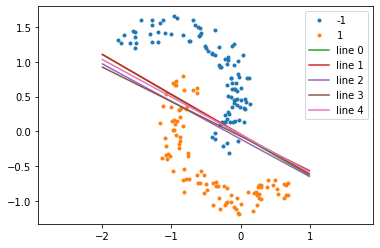

In [19]:
n_runs = 5
n_steps = 1000
alpha = 1
plotData(X,y)

for r in range(n_runs) :
    w = np.zeros(2)*1.0
    b = 0.0
    for i in range(n_steps):
        I = np.random.randint(0,n)
        if (np.vdot(w,X[I]) + b)*y[I] < 1:
            w += 1/np.sqrt(1+k) * y[I] * X[I]
            b += 1/np.sqrt(1+k) * y[I]
    print(f'run {r}, weight and bias :')
    print(list(w),b)
    addline(tuple(w),b,f'line {r}')

- > The pseudo - SVM not only tries to separate the data, but also to maximize the marge between the datapoints and the separation line.

**Question 12:** Based on the previous question, devise an algorithm for the $(SVM)$ problem. This should be based on the response of question 11 with the idea that $(SVM)$ is a linear combination between the loss of $(pseudo-SVM)$ and the $L^2$ norm which gradient you know, with scaling factors $Cn$ and $1/2$. Reproduce the preceeding experiment with the following setting
* initialize weights $w$ and bias $b$ to be equal to $0$
* 10000 iterations
* $\alpha_k = 1 / (50 + k)$ for all $k$.

Which difference do you notice? Can you explain it?

run 0, weight and bias :
[-1.6825423268438906, -2.7923383914539497] -0.38056828384535435
run 1, weight and bias :
[-1.7718619270796339, -2.7355686419705854] -0.2653751501099916
run 2, weight and bias :
[-1.8598863714459903, -2.7339887838654366] -0.13856388231640074
run 3, weight and bias :
[-1.77019916987328, -2.744683260715071] -0.0979431653353858
run 4, weight and bias :
[-1.7296794373315936, -2.679607307949666] -0.2005665969387307


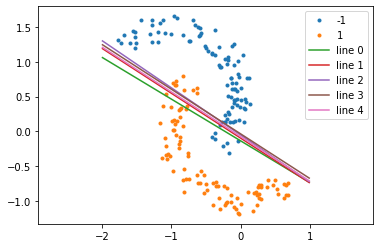

In [24]:
C = 200
n_runs = 5
n_steps = 10000

plotData(X,y)

for r in range(n_runs) :
    w = np.zeros(2)*1.0
    b = 0.0
    for k in range(n_steps):
        alphak = 1/(50+k)
        I = np.random.randint(0,n)
        if (np.vdot(w,X[I]) + b)*y[I] < 1:
            w += C * alphak * y[I] * X[I]
            b += C * alphak * y[I]
        w -=  alphak * w
    print(f'run {r}, weight and bias :')
    print(list(w),b)
    addline(tuple(w),b,f'line {r}')

- > The marge is thinner than previously : this model seems more accurate, and generalizes better.

**Question 13:** Consider the previous experiment, for a single run, plot the distance between the current iterate and the solution given by `scikit-learn` in logarithmic scale. Plot data points should be computed every 100 iterates

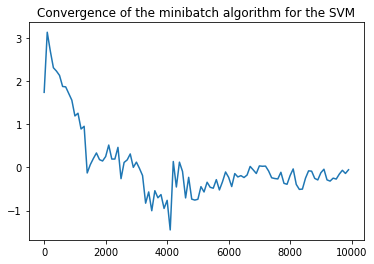

In [89]:
C = 1000
model = SVC(kernel='linear',C=C)
model.fit(X,y)
w_sk, b_sk = model.coef_[0], model.intercept_[0]

n_steps = 10000


logdist = []
index = []
w = np.zeros(2)*1.0
b = 0.0
for k in range(n_steps):
    if k % 100 == 0 :
        logdist.append(np.log(np.sqrt( np.sum((w-w_sk)**2) + (b_sk-b)**2)))
        index.append(k)
    alphak = 1/(50+k)
    I = np.random.randint(0,n)
    if (np.vdot(w,X[I]) + b)*y[I] < 1:
        w += C * alphak * y[I] * X[I]
        b += C * alphak * y[I]
    w -=  alphak * w
plt.plot(index,logdist);
plt.title("Convergence of the minibatch algorithm for the SVM");

**Question 14:** Given $S_k = \frac{1}{k} \sum_{i=1}^k w_i$ and $w_{k+1}$, find a simple formula for $S_{k+1} = \frac{1}{k+1} \sum_{i=1}^k w_i$ without recomputing the sum.

Consider the previous experiment, but instead of $w_k$ and $b_k$ use the averages over all previously seen iterations:
\begin{align*}
    \bar{w}_k = \frac{1}{k} \sum_{i=1}^k w_i \\
    \bar{b}_k = \frac{1}{k} \sum_{i=1}^k b_i \\
\end{align*}
What is the effect of averaging? Use step size $\alpha_k = 0.1 / (500 +  \sqrt{k})$ for all $k$. What do you observe?

run 0, weight and bias (average):
[-1.673933074656353, -2.6017137432232382] -0.19000744002367653
run 1, weight and bias (average):
[-1.7245478853687146, -2.6695739065712747] -0.23593805350463418
run 2, weight and bias (average):
[-1.7538648898047675, -2.6920226771035254] -0.24025931139604714
run 3, weight and bias (average):
[-1.683437756445726, -2.636332488093953] -0.22976179363587013
run 4, weight and bias (average):
[-1.7263120331540032, -2.6569522343883842] -0.18162752658415696


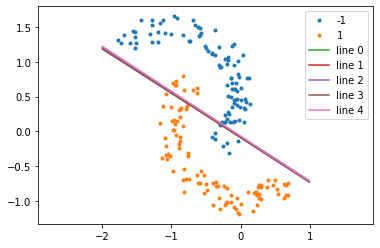

In [90]:
C = n
n_runs = 5
n_steps = 10000

plotData(X,y)

for r in range(n_runs) :
    w = np.zeros(2)*1.0
    b = 0.0
    w_ = w
    b_ = b
    for k in range(1,n_steps):
        alphak = .1/(500+np.sqrt(k))
        I = np.random.randint(0,n)
        if (np.vdot(w,X[I]) + b)*y[I] < 1:
            w += C * alphak * y[I] * X[I]
            b += C * alphak * y[I]
        w -=  alphak * w
        w_ = (k * w_ + w) / (k+1)
        b_ = (k * b_ + b) / (k+1)
        
    print(f'run {r}, weight and bias (average):')
    print(list(w_),b_)
    addline(tuple(w_),b_,f'line {r}')

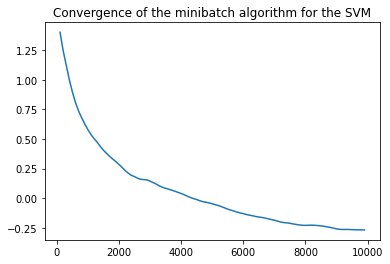

In [104]:
C = 10**3
model = SVC(kernel='linear',C=C)
model.fit(X,y)
w_sk, b_sk = model.coef_[0], model.intercept_[0]

n_steps = 10000
logdist = []
index = []

w = np.zeros(2)*1.0
b = 0.0
w_ = w
b_ = b
for k in range(1,n_steps):
    if k % 100 == 0 :
        logdist.append(np.log(np.sqrt( np.sum((w_-w_sk)**2) + (b_sk-b_)**2)))
        index.append(k)
    alphak = .1/(500+np.sqrt(k))
    I = np.random.randint(0,n)
    if (np.vdot(w,X[I]) + b)*y[I] < 1:
        w += C * alphak * y[I] * X[I]
        b += C * alphak * y[I]
    w -=  alphak * w
    w_ = (k * w_ + w) / (k+1)
    b_ = (k * b_ + b) / (k+1)


plt.plot(index,logdist);
plt.title("Convergence of the minibatch algorithm for the SVM");

- > Averaging is smoothing the curve.

## Exercice 4: Back to the perceptron.

**Bonus question:** Getting back to the perceptron algorithm, run the algorithm with the following parameters
* initialize weights $w$ and bias $b$ to be equal to $0$
* 100000 iterations
* $\alpha_k = 10 / (10 + k)$ for all $k$.

Represent $5$ runs of the algorithm. What do you observe? In which sense does the algorithm seem to converge? If you can find a consistent explaination with a correct mathematical proof, I invite you to the restaurant.

run 0, weight and bias :
[-0.20324960701941194, -0.21988304769198563] -0.044349974686315866
run 1, weight and bias :
[-0.5696159347761408, -0.6229314268342429] -0.11473757256002157
run 2, weight and bias :
[-0.1845402028876759, -0.20808958029883748] -0.03981612158952263
run 3, weight and bias :
[-0.42018858373759305, -0.45422947999576857] -0.08684342976513139
run 4, weight and bias :
[-0.11142137972137497, -0.12424566424948737] -0.023084333647725747


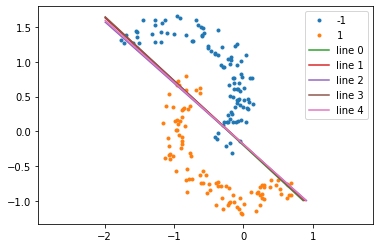

In [106]:
n_runs = 5
n_steps = 10000
plotData(X,y)

for r in range(n_runs) :
    w = np.ones(2)*1.0
    b = 0.0
    for k in range(n_steps):
        I = np.random.randint(0,n)
        if (np.vdot(w,X[I]) + b)*y[I] < 0:
            w += (10/(10+k)) * y[I] * X[I]
            b += (10/(10+k)) * y[I]
    print(f'run {r}, weight and bias :')
    print(list(w),b)
    addline(tuple(w),b,f'line {r}')